In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

In [12]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday,time_of_day
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,Night
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,Night
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,Night
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,Night
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,Night


/var/folders/s5/1lmxvww93pbfs820tmmc_8mm0000gn/T/ipykernel_9363/3158978660.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Counts by Weekday (Brooklyn Bridge)')

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Total Pedestrian Count')

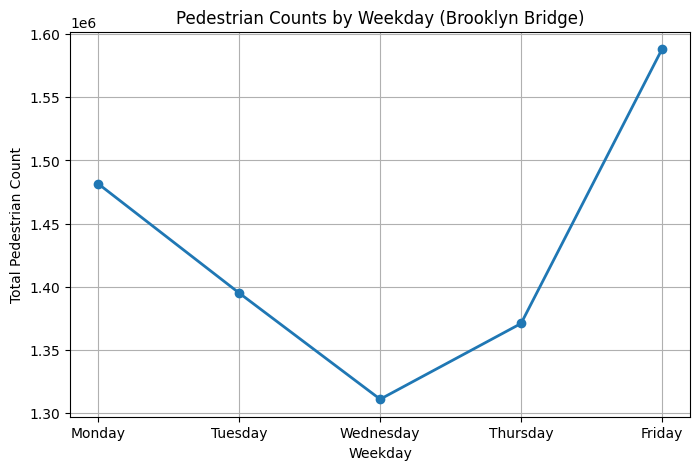

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据并转换日期
df = pd.read_csv("Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251024.csv")
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')

# 2. 提取星期几
df['weekday'] = df['hour_beginning'].dt.day_name()

# 3. 清理 Pedestrians 列（去掉逗号并转为数字）
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'].astype(str).str.replace(',', ''), errors='coerce')

# 4. 筛选工作日
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekdays_df = df[df['weekday'].isin(weekdays)]

# 5. 统计每天总人数
weekday_counts = weekdays_df.groupby('weekday')['Pedestrians'].sum().reindex(weekdays)

# 6. 绘制折线图
plt.figure(figsize=(8,5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linewidth=2)
plt.title('Pedestrian Counts by Weekday (Brooklyn Bridge)')
plt.xlabel('Weekday')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

In [10]:
# 1. 选择 2019 年的数据
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# 2. 计算每种天气下的总行人数量
weather_summary = df_2019.groupby('weather_summary')['Pedestrians'].sum().reset_index()

# 3. 计算相关矩阵（例如温度、降水量、人数）
corr = df_2019[['Pedestrians', 'temperature', 'precipitation']].corr()
print(corr)


               Pedestrians  temperature  precipitation
Pedestrians       1.000000     0.358757      -0.105432
temperature       0.358757     1.000000       0.001911
precipitation    -0.105432     0.001911       1.000000


3. Implement a custom function to categorize time of day intomorning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [11]:
# 1. 定义函数
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# 2. 添加新列
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time)

# 3. 分析一天中各时间段行人数量
time_of_day_counts = df.groupby('time_of_day')['Pedestrians'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
print(time_of_day_counts)


time_of_day
Morning      2480582
Afternoon    5852025
Evening      2432145
Night         268114
Name: Pedestrians, dtype: int64
